 # ML's Unsupervised - Pokemon Statistics Clustering

---

## Context (文脈)

Images of all Pokemon from generation 1 to generation 7, along with their types (primary and secondary) as a csv.
Inspiration by new evolution forms from two different Pokemon. (Create new Pokemon) and make predict Pokemon primary and secondary types from the images.
Identify what types the evolution form will have based on the pre-evolved forms. Eg. from Pichu and Pikachu predict for Raichu.
Future work/Ideas there are merge with other information such as moves, generation, strong/weak against etc, and use the images to classify.

## About Dataset

Content (内容):

This data set includes 1045 Pokemons, including their number, name, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. It has been of great use when teaching statistics to kids. With certain types you can also give a geeky introduction to machine learning.

This are the raw attributes that are used for calculating how much damage an attack will do in the games. This dataset is about the pokemon games (NOT pokemon cards or Pokemon Go).

The data as described by Shubham Chambhare contains the following columns:

- Name: Name of each pokemon
- Total: sum of all stats that come after this, a general guide to how strong a pokemon is
- HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
- Attack: the base modifier for normal attacks (eg. Scratch, Punch)
- Defense: the base damage resistance against normal attacks
- SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
- SP Def: the base damage resistance against special attacks
- Speed: determines which pokemon attacks first each round


## Impor Needed Library

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from sklearn.mixture import GaussianMixture
import os
import cv2
import random
import matplotlib.pyplot as plt
from PIL import Image

In [9]:
data = pd.read_csv("/content/drive/MyDrive/Machine Learning/Clustering/pokemon-stats/pokemon_df.csv")
data[0:10]

,Name,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65
5,Charmeleon,405,58,64,58,80,65,80
6,Charizard,534,78,84,78,109,85,100
7,Charizard,634,78,130,111,130,85,100
8,Charizard,634,78,104,78,159,115,100
9,Squirtle,314,44,48,65,50,64,43


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1045 non-null   object
 1   Total       1045 non-null   int64 
 2   HP          1045 non-null   int64 
 3   Attack      1045 non-null   int64 
 4   Defence     1045 non-null   int64 
 5   Sp_attack   1045 non-null   int64 
 6   Sp_defence  1045 non-null   int64 
 7   Speed       1045 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 65.4+ KB


# Clustering by Attack and Defence

In [ ]:
data2 = data[['Attack','Defence']]

In [ ]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust,metric='euclidean',linkage='ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

clust_labels1 = doAgglomerative(data2,20)
agglomerative = pd.DataFrame(clust_labels1)
data2.insert((data2.shape[1]),'agglomerative',agglomerative)

In [ ]:
data3 = data2
data3['Name']=data['Name']
data3

<ipython-input-77-958efacf9ba9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Name']=data['Name']


,Attack,Defence,agglomerative,Name
0,49,49,2,Bulbasaur
1,62,63,13,Ivysaur
2,82,83,12,Venusaur
3,100,123,8,Venusaur
4,52,43,2,Charmander
...,...,...,...,...
1040,145,130,10,Glastrier
1041,65,60,13,Spectrier
1042,80,80,12,Calyrex
1043,165,150,10,Calyrex


In [ ]:
for i in range(20):
    names0=data3[data3['agglomerative']==i]['Name']
    print('### Agglomerative '+str(i))
    print(list(set(names0)))
    print()

### Agglomerative 0
['Carbink', 'Deoxys', 'Cofagrigus', 'Toxapex', 'Onix', 'Cosmoem', 'Aegislash', 'Registeel', 'Nosepass', 'Bastiodon', 'Probopass', 'Shuckle']

### Agglomerative 1
['Drifloon', 'Wurmple', 'Zubat', 'Clefairy', 'Floette', 'Mime Jr.', 'Jynx', 'Tyrogue', 'Electrike', 'Surskit', 'Happiny', 'Hatenna', 'Toxel', 'Goomy', 'Gastly', 'Spoink', 'Ledyba', 'Feebas', 'Scatterbug', 'Meowth', 'Noibat', 'Flabébé', 'Lotad', 'Wimpod', 'Solosis', 'Tentacool', 'Bidoof', 'Wingull', 'Rookidee', 'Bounsweet', 'Milcery', 'Mareep', 'Kadabra', 'Sinistea', 'Smoochum', 'Abra', 'Ralts', 'Sobble', 'Igglybuff', 'Jigglypuff', 'Caterpie', 'Combee', 'Azurill', 'Munna', 'Smeargle', 'Sunkern', 'Cleffa', 'Wooper', 'Fennekin', 'Slugma', 'Vulpix', 'Pichu', 'Snom', 'Zigzagoon', 'Skitty', 'Treecko', 'Burmy', 'Chansey', 'Weedle', 'Sentret', 'Impidimp', 'Chinchou', 'Budew', 'Salandit', 'Purrloin', 'Cutiefly', 'Cosmog', 'Blipbug', 'Woobat', 'Bunnelby', 'Kirlia', 'Wishiwashi', 'Nickit', 'Kricketot', 'Helioptile', '

# Favourite Pokemon ⭐

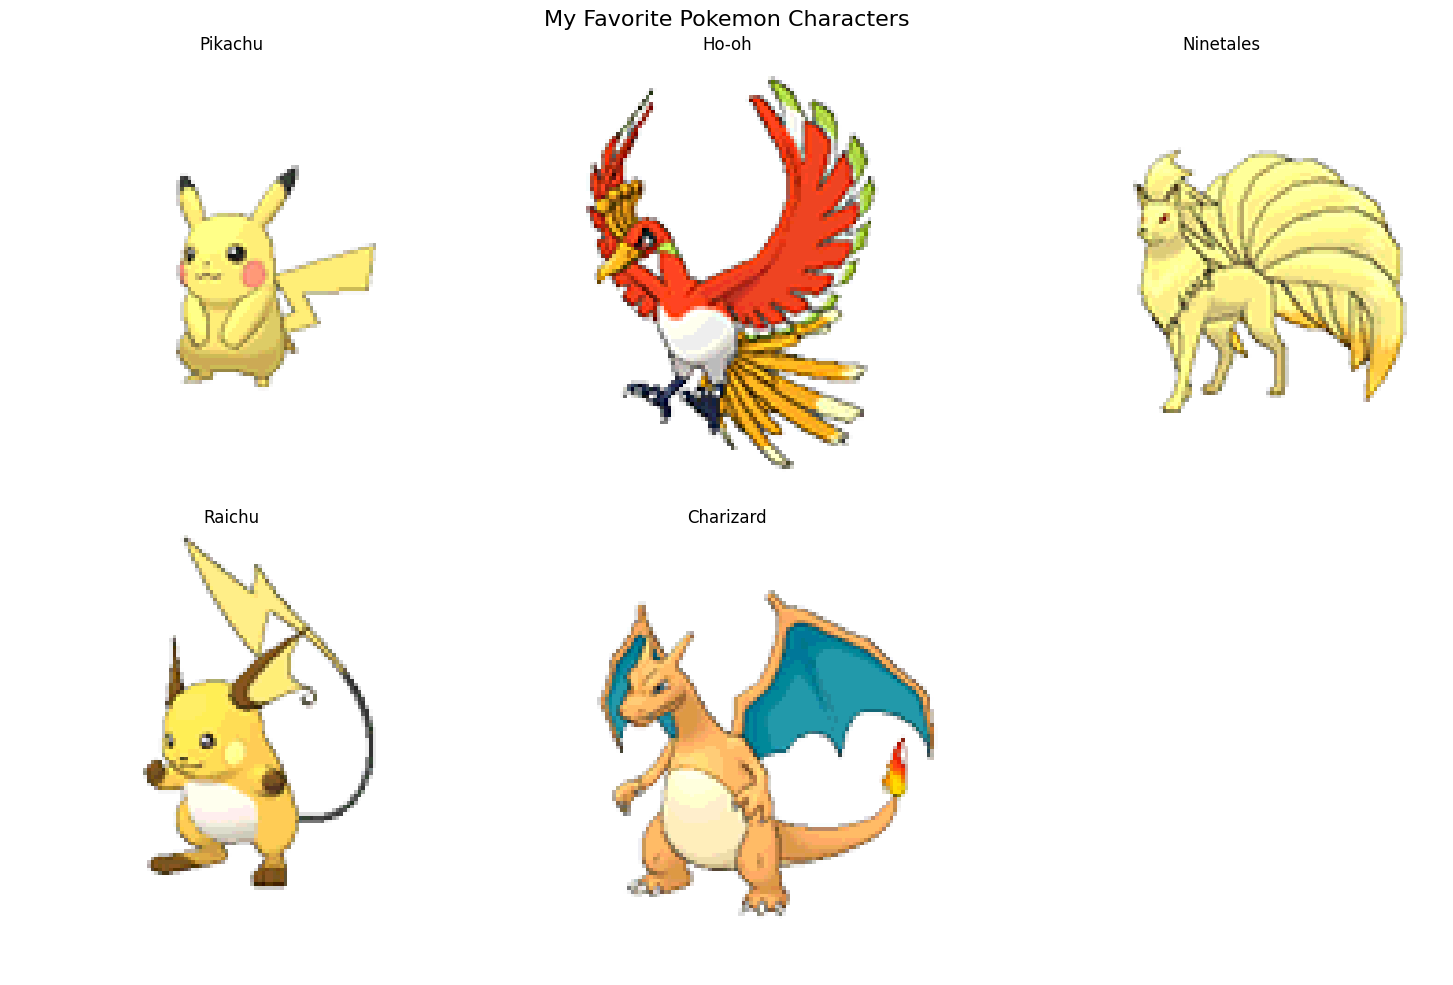

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Daftar karakter Pokemon favorit
favorite_pokemon = ['pikachu', 'ho-oh', 'ninetales', 'raichu', 'charizard']

# Direktori gambar
image_dir = "/content/drive/MyDrive/Machine Learning/Clustering/pokemon-images/"

# Membuat subplot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Iterasi melalui daftar Pokemon favorit
for i, pokemon in enumerate(favorite_pokemon):
    # Path gambar
    img_path = os.path.join(image_dir, f"{pokemon}.png")

    # Cek apakah file ada
    if os.path.exists(img_path):
        # Baca gambar
        img = Image.open(img_path)

        # Tampilkan gambar di subplot
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(pokemon.capitalize())
    else:
        axes[i].text(0.5, 0.5, f"{pokemon.capitalize()} not found",
                     ha='center', va='center')
        axes[i].axis('off')

# Sembunyikan subplot yang tidak digunakan
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("My Favorite Pokemon Characters", fontsize=16)
plt.tight_layout()
plt.show()

## Clustering Model

In [ ]:
data3.groupby('agglomerative')[['Attack', 'Defence']].mean()

,Attack,Defence
agglomerative,,
0,49.500000,155.500000
1,34.426829,34.060976
2,58.830508,42.432203
3,109.300000,204.500000
4,99.337662,79.155844
5,120.742857,74.014286
6,146.450000,54.700000
7,75.641509,104.490566
8,98.905660,125.150943


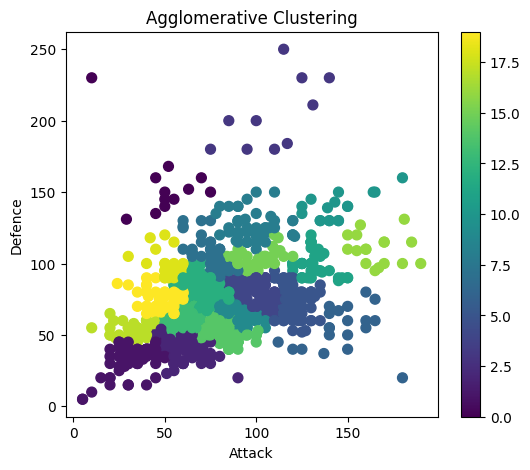

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data2['Attack'],data2['Defence'],c=agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('Attack')
ax.set_ylabel('Defence')
plt.rcParams['figure.figsize'] = (6,5)
plt.colorbar(scatter)

### Grouping Max Attack Ability

In [ ]:
NamesA = data2[data2['agglomerative']==6]['Name']
print(list(NamesA))

['Beedrill', 'Mewtwo', 'Blaziken', 'Sharpedo', 'Sharpedo', 'Banette', 'Absol', 'Deoxys', 'Deoxys', 'Cranidos', 'Rampardos', 'Darmanitan', 'Darmanitan', 'Darmanitan', 'Archen', 'Archeops', 'Greninja', 'Aegislash', 'Hoopa', 'Pheromosa']


In [ ]:
filesA=[]

for item in set(NamesA):
    filesA+=[item.lower()+'.png']
print(len(filesA))

16


In [ ]:
img_dir = '/content/drive/MyDrive/Machine Learning/Clustering/pokemon-images'

In [ ]:
filesA2=[]

for i in range(len(filesA)):
    if cv2.imread(os.path.join(img_dir,filesA[i])) is not None:
        filesA2+=[os.path.join(img_dir,filesA[i])]
random.shuffle(filesA2)
print(len(filesA2))

12


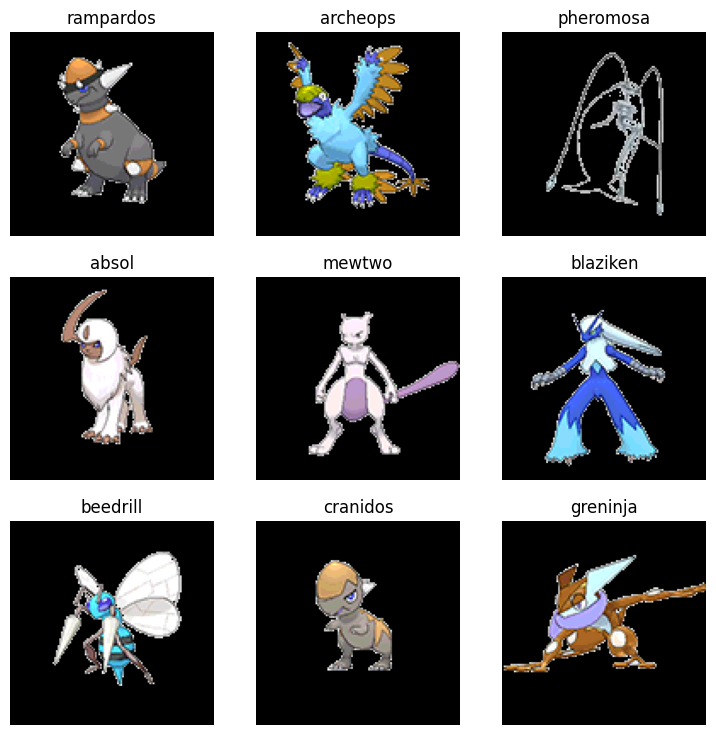

In [ ]:
fig, axs = plt.subplots(3,3,figsize=(9,9))

for i in range(9):
    r=i//3
    c=i%3
    img1 = cv2.imread(filesA2[i])
    file=filesA2[i].split('/')[-1][0:-4]
    ax=axs[r][c].axis("off")
    ax=axs[r][c].set_title(file)
    ax=axs[r][c].imshow(img1)

plt.show()

### Grouping Min Attack Ability

In [ ]:
NamesB = data2[data2['agglomerative']==17]['Name']
print(list(NamesB))

['Metapod', 'Kakuna', 'Seel', 'Voltorb', 'Staryu', 'Magikarp', 'Ledian', 'Togepi', 'Marill', 'Wobbuffet', 'Silcoon', 'Cascoon', 'Seedot', 'Shroomish', 'Meditite', 'Minun', 'Gulpin', 'Swablu', 'Baltoy', 'Wynaut', 'Spheal', 'Luvdisc', 'Cherubi', 'Chingling', 'Mantyke', 'Snivy', 'Venipede', 'Cottonee', 'Petilil', 'Gothita', 'Duosion', 'Frillish', 'Litwick', 'Lampent', 'Spewpa', 'Dewpider', 'Morelull', 'Steenee', 'Gossifleur', 'Wooloo', 'Rolycoly']


In [ ]:
filesB=[]

for item in set(NamesB):
    filesB+=[item.lower()+'.png']
print(len(filesB))

41


In [ ]:
filesB2=[]

for i in range(len(filesB)):
    if cv2.imread(os.path.join(img_dir,filesB[i])) is not None:
        filesB2+=[os.path.join(img_dir,filesB[i])]
random.shuffle(filesB2)

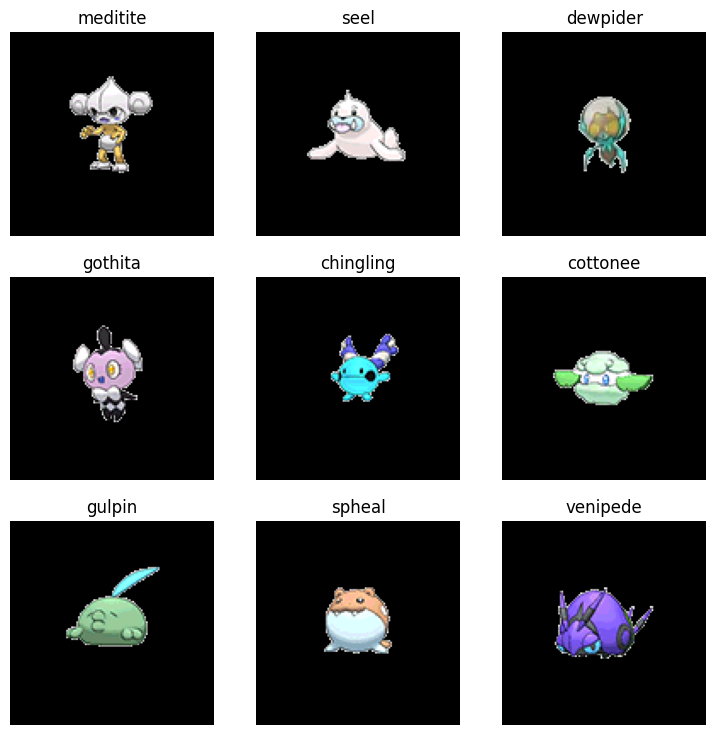

In [ ]:
fig, axs = plt.subplots(3,3,figsize=(9,9))

for i in range(9):
    r=i//3
    c=i%3
    img1 = cv2.imread(filesB2[i])
    file=filesB2[i].split('/')[-1][0:-4]
    ax=axs[r][c].axis("off")
    ax=axs[r][c].set_title(file)
    ax=axs[r][c].imshow(img1)

plt.show()

# Clustering by HP and Speed

In [10]:
data4 = data[['HP','Speed']]

In [11]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust,metric='euclidean',linkage='ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

clust_labels1 = doAgglomerative(data4,20)
agglomerative = pd.DataFrame(clust_labels1)
data4.insert((data4.shape[1]),'Agglomerative',agglomerative)

In [12]:
data5 = data4
data5['Name'] = data['Name']
data5

<ipython-input-12-79eb5e4ca20d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['Name'] = data['Name']


,HP,Speed,Agglomerative,Name
0,45,45,2,Bulbasaur
1,60,60,11,Ivysaur
2,80,80,0,Venusaur
3,80,80,0,Venusaur
4,39,65,3,Charmander
...,...,...,...,...
1040,100,30,16,Glastrier
1041,100,130,15,Spectrier
1042,100,80,0,Calyrex
1043,100,50,5,Calyrex


In [13]:
for i in range(20):
    names1 = data5[data5['Agglomerative']==i]['Name']
    print('### Agglomerative '+str(i))
    print(list(set(names1)))
    print()

### Agglomerative 0
['Grumpig', 'Scizor', 'Seismitoad', 'Bibarel', 'Mr. Rime', 'Articuno', 'Whiscash', 'Xurkitree', 'Nidoking', 'Braviary', 'Stonjourner', 'Toxtricity', 'Blastoise', 'Decidueye', 'Dragonite', 'Altaria', 'Mightyena', 'Noctowl', 'Gothitelle', 'Corviknight', 'Honchkrow', 'Umbreon', 'Tyranitar', 'Lycanroc', 'Blaziken', 'Glalie', 'Stoutland', 'Lunatone', 'Barbaracle', 'Castform', 'Ludicolo', 'Mothim', 'Poliwrath', 'Gourgeist', 'Garbodor', 'Togekiss', 'Metagross', 'Dracovish', 'Palpitoad', 'Samurott', 'Passimian', 'Gyarados', 'Frosmoth', 'Magearna', 'Solrock', 'Calyrex', 'Shiftry', 'Flapple', 'Mantine', 'Volcanion', 'Mesprit', 'Slurpuff', 'Nidoqueen', 'Politoed', 'Kricketune', 'Toxicroak', 'Sandaconda', 'Goodra', 'Golduck', 'Seaking', 'Hoopa', 'Milotic', 'Necrozma', 'Dewgong', 'Florges', 'Drednaw', 'Drifloon', 'Tsareena', 'Chinchou', 'Chimecho', 'Venusaur', 'Raticate', 'Seviper', 'Heatran', 'Victreebel', 'Luxray', 'Feraligatr', 'Centiskorch', 'Diggersby', 'Walrein', 'Dracozol

## Modeling of Cluster

In [14]:
data5.groupby('Agglomerative')[['HP', 'Speed']].mean()

,HP,Speed
Agglomerative,,
0,84.524272,73.495146
1,213.777778,66.777778
2,49.368421,38.092105
3,41.324561,60.877193
4,42.840909,88.818182
5,90.075000,51.912500
6,104.625000,94.675000
7,75.984375,117.359375
8,64.333333,156.333333


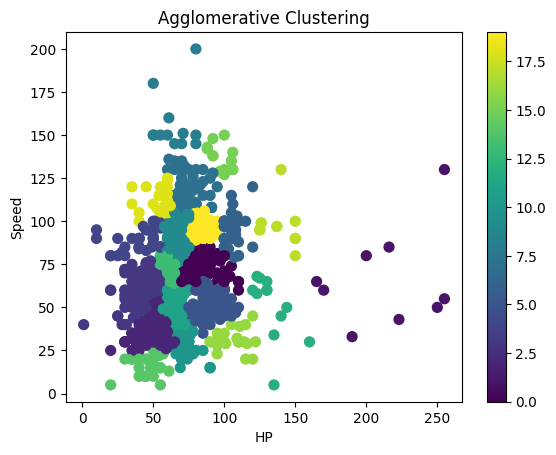

In [15]:
fig = plt.figure()

ax = fig.add_subplot(111)
scatter = ax.scatter(data4['HP'],data4['Speed'],c=agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('HP')
ax.set_ylabel('Speed')
plt.rcParams['figure.figsize'] = (10,5)
plt.colorbar(scatter)

### Grouping Max HP Ability

In [16]:
NamesC = data4[data4['Agglomerative']==6]['Name']
print(list(NamesC))

['Kangaskhan', 'Kangaskhan', 'Mew', 'Entei', 'Suicune', 'Lugia', 'Ho-oh', 'Celebi', 'Kyogre', 'Kyogre', 'Groudon', 'Groudon', 'Rayquaza', 'Rayquaza', 'Jirachi', 'Skuntank', 'Garchomp', 'Garchomp', 'Mamoswine', 'Dialga', 'Regigigas', 'Cresselia', 'Manaphy', 'Shaymin', 'Arceus', 'Victini', 'Excadrill', 'Darmanitan', 'Darmanitan', 'Mandibuzz', 'Reshiram', 'Zekrom', 'Meloetta', 'Zygarde', 'Nihilego', 'Buzzwole', 'Rillaboom', 'Urshifu', 'Urshifu', 'Zarude']


In [17]:
filesC=[]

for item in set(NamesC):
    filesC+=[item.lower()+'.png']
print(len(filesC))

33


In [18]:
img_dir = '/content/drive/MyDrive/Machine Learning/Clustering/pokemon-images'

In [20]:
filesC2=[]

for i in range(len(filesC)):
    if cv2.imread(os.path.join(img_dir,filesC[i])) is not None:
        filesC2+=[os.path.join(img_dir,filesC[i])]
random.shuffle(filesC2)
print(len(filesC2))

26


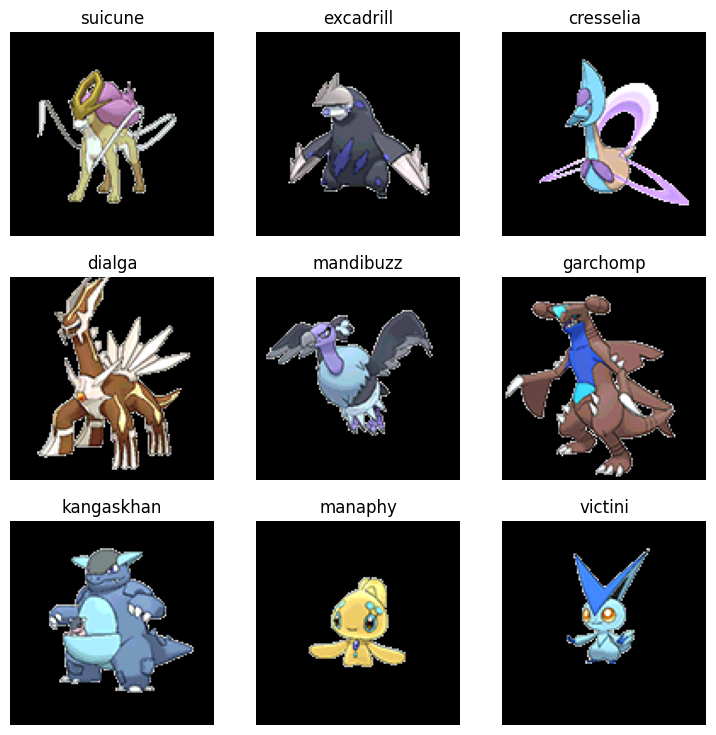

In [21]:
fig, axs = plt.subplots(3,3,figsize=(9,9))

for i in range(9):
    r=i//3
    c=i%3
    img1 = cv2.imread(filesC2[i])
    file=filesC2[i].split('/')[-1][0:-4]
    ax=axs[r][c].axis("off")
    ax=axs[r][c].set_title(file)
    ax=axs[r][c].imshow(img1)

plt.show()

### Grouping Min HP Ability

In [22]:
NamesD = data4[data4['Agglomerative']==17]['Name']
print(list(NamesD))

['Slaking', 'Drifblim', 'Giratina', 'Giratina', 'Kyurem', 'Kyurem', 'Kyurem', 'Xerneas', 'Yveltal', 'Solgaleo', 'Lunala', 'Eternatus']


In [23]:
filesD=[]

for item in set(NamesD):
    filesD+=[item.lower()+'.png']
print(len(filesD))

9


In [24]:
filesD2=[]

for i in range(len(filesD)):
    if cv2.imread(os.path.join(img_dir,filesD[i])) is not None:
        filesD2+=[os.path.join(img_dir,filesD[i])]
random.shuffle(filesD2)

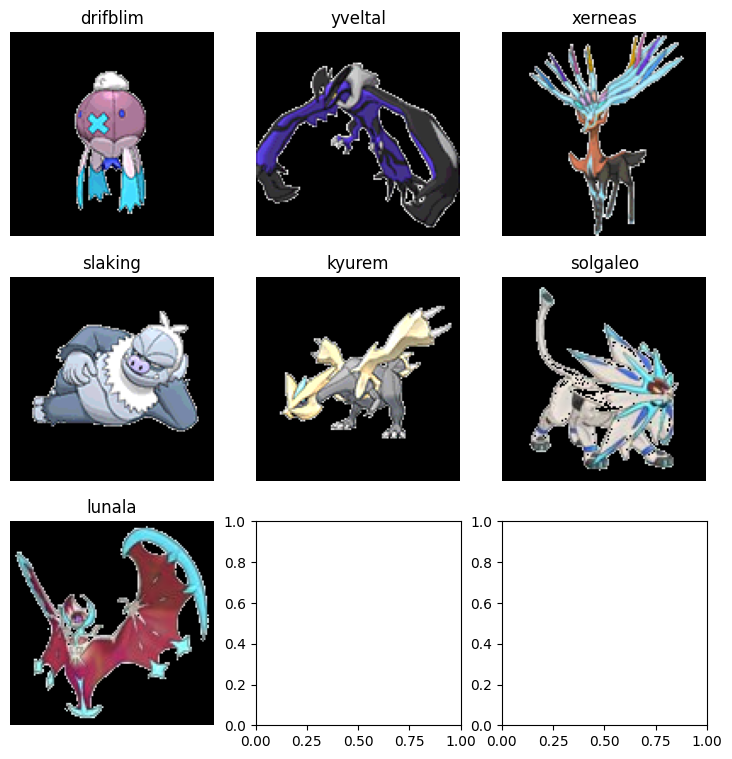

In [28]:
fig, axs = plt.subplots(3,3,figsize=(9,9))

for i in range(min(9, len(filesD2))):  # Iterate up to the length of filesD2 or 9, whichever is smaller
    r=i//3
    c=i%3
    img1 = cv2.imread(filesD2[i])
    file=filesD2[i].split('/')[-1][0:-4]
    ax=axs[r][c].axis("off")
    ax=axs[r][c].set_title(file)
    ax=axs[r][c].imshow(img1)

plt.show()